## The aim of this notebook is to visualize the performance of any 2 attackers in the English Premier league
## Many thanks to https://www.premierleague.com/
### Lets start

In [1]:
import re
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Scraping the preimer league website to get the data

In [2]:
def get_player_info(url):
    
    # Loading the web page as HTML
    
    page = urlopen(url)
    html = page.read().decode("utf-8")
    
      
    #------------------------number of matches played per season-----------

    pattern_appear = '<td class="appearances">\n.*<'

    appear_text = re.findall(pattern_appear, html, re.IGNORECASE)

    appear = []

    for app in appear_text:

        appear.append(int(app[33:35].strip()))
    #--------------------------goals scored per season-------------

    pattern_goals = '<td class="goals">\n.*'

    goals_text = re.findall(pattern_goals, html, re.IGNORECASE)

    goals = []

    for goal in goals_text:

        goals.append(int(goal[-2:].strip()))

  
    #------------------ saving the info to a dataframe---------------
    
    df = pd.DataFrame({"Appearance":appear , "Goals":goals })
    
    #------------------removing seasons with no appearances----------
    df = df[df["Appearance"]!=0]
    
        
    df["Goal rate"]=df["Goals"]/df["Appearance"]
    
    return df

### Compare the goal rates of each player

In [3]:
def compare_players(df1 , df2 , name1 , name2):
    
    num_seasons = min(len(df1["Goal rate"]) , len(df2["Goal rate"]))
    
    x = np.arange(num_seasons)+1
    
    y1 = df1["Goal rate"].values[::-1] 
    
    y2 = df2["Goal rate"].values[::-1]
    
    plt.plot(x , y1[:len(x)] )
    
    plt.plot(x , y2[:len(x)] )
    
    plt.xlabel('Seasons order in PL')
    plt.ylabel('Goal Rate')
    plt.title('Player comaprison')
    
    plt.legend([name1 , name2])
    

### Testing

In [7]:
url_salah = "https://www.premierleague.com/players/5178/player/overview"

url_ronaldo = "https://www.premierleague.com/players/2522/Cristiano-Ronaldo/overview"

url_auba = "https://www.premierleague.com/players/5110/Pierre-Emerick-Aubameyang/overview"

### Lets load the data

In [8]:
df_salah = get_player_info(url_salah)

df_auba = get_player_info(url_auba)

df_ronaldo = get_player_info(url_ronaldo)

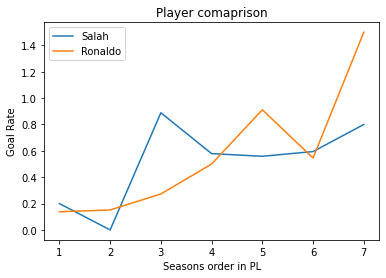

In [11]:
compare_players(df_salah , df_ronaldo , "Salah"  , "Ronaldo")

### Hmmm... not enough info to judge who is better

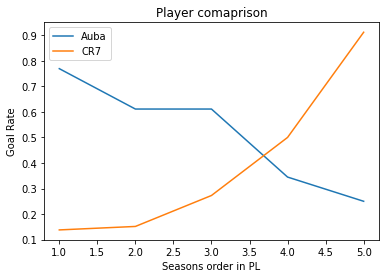

In [10]:
compare_players(df_auba ,df_ronaldo , "Auba" , "CR7")

### it seems that Auba is having tough times